In [2]:
pip install gurobipy


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.1 MB 21.0 MB/s eta 0:00:01
   ----------------- ---------------------- 5.0/11.1 MB 18.9 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 18.6 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 17.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import gurobipy as gpy


model = gpy.Model('Product_Production') 
model.ModelSense = gpy.GRB.MAXIMIZE

product1 = model.addVar(vtype=gpy.GRB.CONTINUOUS, name="product1")
product2 = model.addVar(vtype=gpy.GRB.CONTINUOUS, name="product2")
product3 = model.addVar(vtype=gpy.GRB.CONTINUOUS, name="product3")


model.setObjective(50*product1 + 20*product2 + 25*product3, gpy.GRB.MAXIMIZE)


model.addConstr(9*product1 + 3*product2 + 5*product3 <= 500, "machine_constraint")
model.addConstr(5*product1 + 4*product2 <= 350, "lathe_constraint")
model.addConstr(3*product1 + 2*product3 <= 150, "grinder_constraint")
model.addConstr(product3 == 20, "custom_units_constraint")

model.optimize()

for v in model.getVars():
    print(v.varName, v.x)

print('Objective:', model.objVal)

Restricted license - for non-production use only - expires 2026-11-23
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-4770 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 3 columns and 8 nonzeros
Model fingerprint: 0x0e8d5b74
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [2e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 5e+02]
Presolve removed 2 rows and 1 columns
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.1666667e+03   2.289454e+01   0.000000e+00      0s
       2    2.9047619e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.904761905e+03
product1 26.19047619047619
product2 54.76190476190476


In [8]:
print("Product Quantities:\n")
print(f"Product 1: The factory should produce {product1.x:.2f} units of Product 1.")
print(f"Product 2: The factory should produce {product2.x:.2f} units of Product 2.")
print(f"Product 3: The factory must produce {product3.x:.0f} units of Product 3 (this was a fixed constraint).")


Product Quantities:

Product 1: The factory should produce 26.19 units of Product 1.
Product 2: The factory should produce 54.76 units of Product 2.
Product 3: The factory must produce 20 units of Product 3 (this was a fixed constraint).


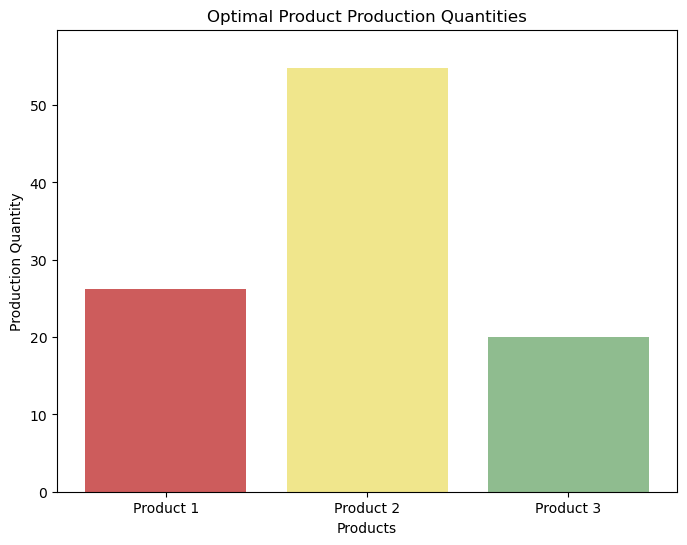

In [12]:
import matplotlib.pyplot as plt
# Visualization of the production plan
product_names = ['Product 1', 'Product 2', 'Product 3']
production_quantities = [product1.x, product2.x, product3.x]

# Plotting the production quantities
plt.figure(figsize=(8, 6))
plt.bar(product_names, production_quantities, color=['indianred', 'khaki', 'darkseagreen'])
plt.title('Optimal Product Production Quantities')
plt.xlabel('Products')
plt.ylabel('Production Quantity')
plt.ylim(0, max(production_quantities) + 5) 
plt.show()